In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import yfinance as yf

In [2]:


# Fetch stock data from Yahoo Finance API
# ticker = 'AAPL'  # Example stock ticker
# data = yf.download(ticker, period='10y')  # Fetch last 10 years of data
# data.reset_index(inplace=True)  # Reset index to make 'Date' a column
data = pd.read_csv('NVDA_stock_data.csv')

In [3]:

# Preprocess the data
data

,Date,Adj Close,Close,High,Low,Open,Volume
0,1999-01-22,0.037615,0.041016,0.048828,0.038802,0.043750,2714688000
1,1999-01-25,0.041556,0.045313,0.045833,0.041016,0.044271,510480000
2,1999-01-26,0.038331,0.041797,0.046745,0.041146,0.045833,343200000
3,1999-01-27,0.038212,0.041667,0.042969,0.039583,0.041927,244368000
4,1999-01-28,0.038092,0.041536,0.041927,0.041276,0.041667,227520000
...,...,...,...,...,...,...,...
6553,2025-02-10,133.570007,133.570007,135.000000,129.960007,130.089996,216989100
6554,2025-02-11,132.800003,132.800003,134.479996,131.020004,132.580002,178902400
6555,2025-02-12,131.139999,131.139999,132.240005,129.080002,130.020004,160278600
6556,2025-02-13,135.289993,135.289993,136.500000,131.169998,131.559998,197430000


In [4]:

# check for missing values (null values) in the data 
data.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

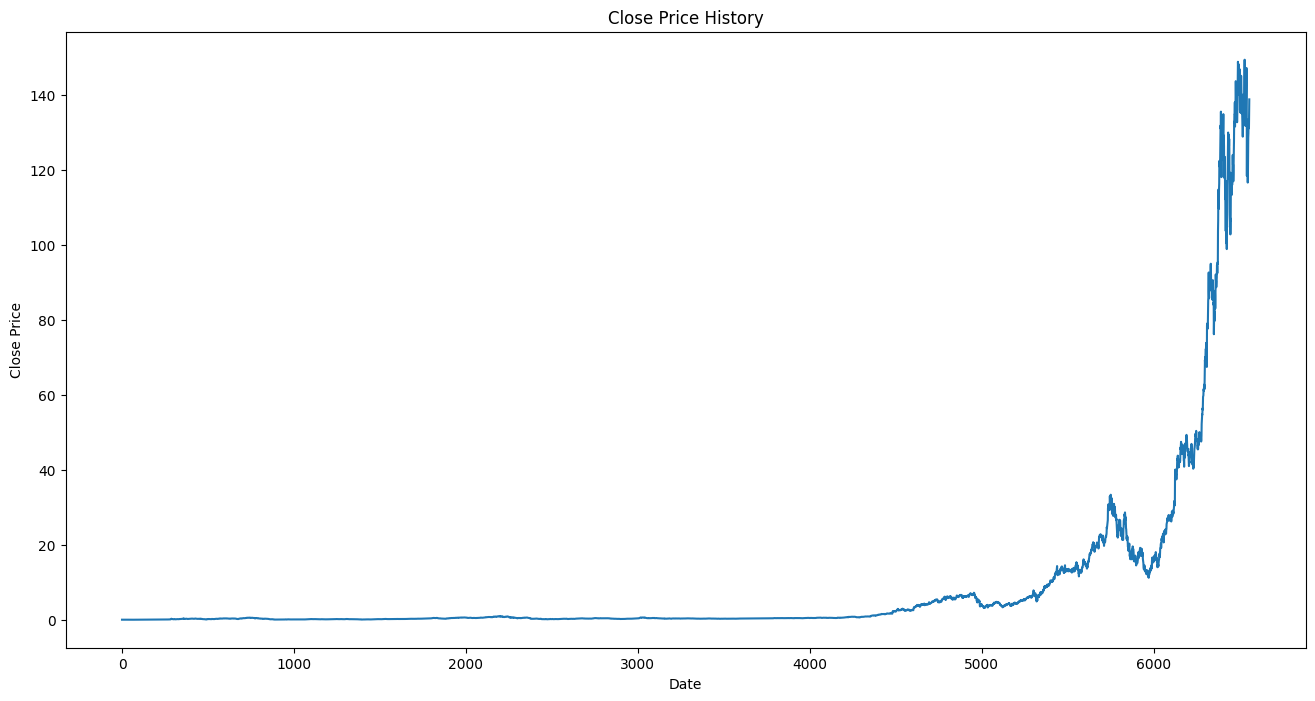

In [5]:

# plot the 'Close' price history of the stock to visualize the stock price trend.
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close Price history')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price History')
plt.show()

In [6]:

# convert the 'Date' column to datetime format and set it as the index of the DataFrame
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [7]:

#  extract the 'Close' price values and reshape them into a suitable format for the LSTM model.
dataset = data['Close'].values
dataset = dataset.reshape(-1, 1)

In [8]:

# use MinMaxScaler to scale the data between 0 and 1. 
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [9]:


timesteps = 60
X_train = []
y_train = []

In [10]:


for i in range(timesteps, len(scaled_data)):
    X_train.append(scaled_data[i-timesteps:i, 0])
    y_train.append(scaled_data[i, 0])

In [11]:


X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

c:\Users\puruG\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:


model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:


model.fit(X_train, y_train, batch_size=30, epochs=100  )
model.save('stock_model.keras')
model.summary()

Epoch 1/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - loss: 0.0023
Epoch 2/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 3.0008e-04
Epoch 3/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 1.4316e-04
Epoch 4/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 1.7463e-04
Epoch 5/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - loss: 1.5931e-04
Epoch 6/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 1.7600e-04
Epoch 7/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 2.0066e-04
Epoch 8/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 9.1363e-05
Epoch 9/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 8.8354e-05
Epoch 10/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 8.9514e-05
Epoch 11/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 8.6250e-05
Epoch 12/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 8.5512e-05
Epoch 13/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - loss: 8.0072e-05
Epoch 14/100
217/217 ━━━━━━━━━━━━━━━━━━━━ 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

In [16]:
test_data = scaled_data[len(scaled_data) - len(y_train) - timesteps:]

In [17]:


X_test = []
for i in range(timesteps, len(test_data)):
    X_test.append(test_data[i-timesteps:i, 0])

In [18]:


X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [19]:

from keras.models import load_model

# Load the saved model
loaded_model = load_model('stock_model.keras')

predictions = loaded_model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

204/204 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step


In [20]:


train = data[:len(data) - len(y_train)]
valid = data[len(data) - len(y_train):]
valid['Predictions'] = predictions

C:\Users\puruG\AppData\Local\Temp\ipykernel_1948\2840773739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


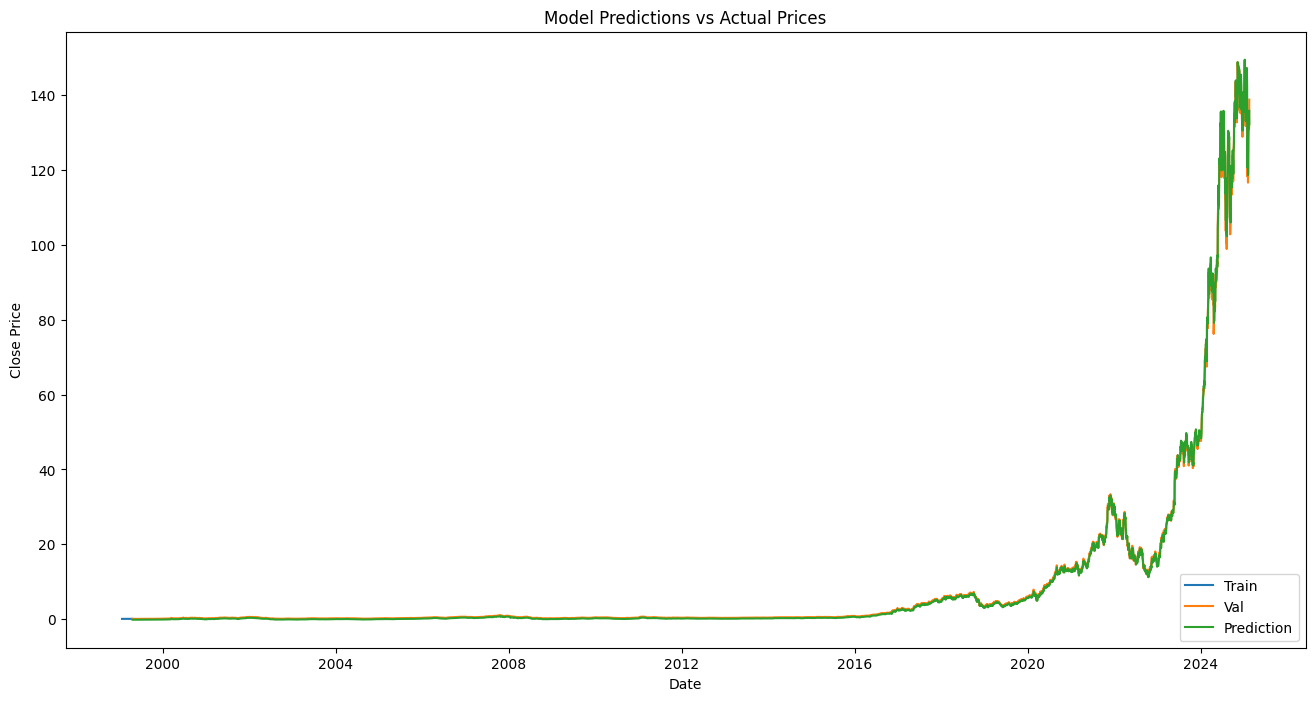

In [21]:

   
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Model Predictions vs Actual Prices')
plt.legend(['Train', 'Val', 'Prediction'], loc='lower right')
plt.show()

In [22]:


from sklearn.metrics import mean_squared_error, mean_absolute_error

In [23]:


mse = mean_squared_error(valid['Close'], valid['Predictions'])
print('Mean Squared Error:', mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 0.8058546972115728
Root Mean Squared Error: 0.8976941000204762


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


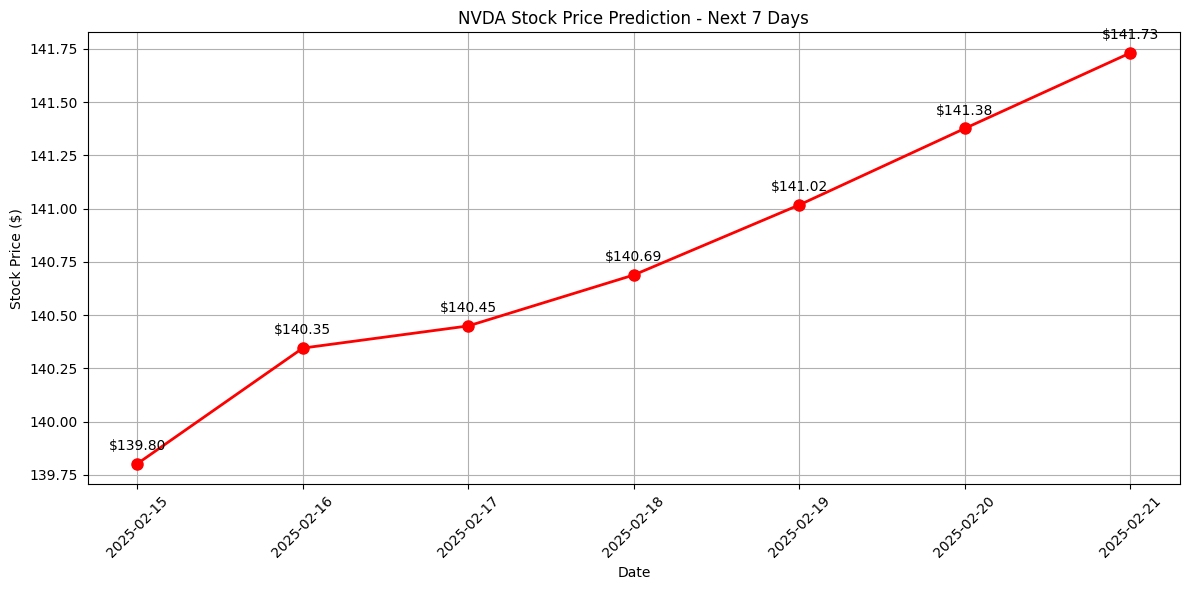


Predicted Stock Prices for Next 7 Days:
            Predicted_Close
2025-02-15       139.802399
2025-02-16       140.345230
2025-02-17       140.449280
2025-02-18       140.688461
2025-02-19       141.017487
2025-02-20       141.376358
2025-02-21       141.731094

Last known price: $138.85
Predicted price after 7 days: $141.73
Expected change: 2.07%


C:\Users\puruG\AppData\Local\Temp\ipykernel_1948\2267806698.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_price = data['Close'][-1]
C:\Users\puruG\AppData\Local\Temp\ipykernel_1948\2267806698.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_change = (future_df['Predicted_Close'][-1] - last_price) / last_price * 100
C:\Users\puruG\AppData\Local\Temp\ipykernel_1948\2267806698.py:64: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, us

In [26]:
# %%
# After your existing code, add the following to predict the next 7 days

# Get the last 'timesteps' days of data to use as input for prediction
last_timesteps_data = scaled_data[-timesteps:]
X_future = last_timesteps_data.reshape(1, timesteps, 1)

# Create arrays to store predictions
future_predictions = []
future_dates = []

# Predict next 7 days
for i in range(7):
    # Get prediction for next day
    next_day_prediction = model.predict(X_future)
    # Store the prediction
    future_predictions.append(next_day_prediction[0, 0])
    
    # Update the input sequence by removing the first value and adding the new prediction
    X_future = np.append(X_future[:, 1:, :], next_day_prediction.reshape(1, 1, 1), axis=1)
    
    # Create the date for the predicted day
    next_date = data.index[-1] + pd.Timedelta(days=i+1)
    future_dates.append(next_date)

# Convert predictions to original scale
future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

# Create DataFrame for future predictions
future_df = pd.DataFrame(index=future_dates, data=future_predictions, columns=['Predicted_Close'])

# %%
# Create a separate graph only for future predictions
ticker = 'NVDA'  # Example stock ticker
plt.figure(figsize=(12, 6))
plt.plot(future_df.index, future_df['Predicted_Close'], 'r-o', linewidth=2, markersize=8)
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.title(f'{ticker} Stock Price Prediction - Next 7 Days')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Add price labels above each point
for i, price in enumerate(future_df['Predicted_Close']):
    plt.annotate(f'${price:.2f}', 
                 (future_df.index[i], price),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.show()

# Display the predicted values for the next 7 days
print("\nPredicted Stock Prices for Next 7 Days:")
print(future_df)

# Calculate the expected percentage change from the last known price
last_price = data['Close'][-1]
predicted_change = (future_df['Predicted_Close'][-1] - last_price) / last_price * 100

print(f"\nLast known price: ${last_price:.2f}")
print(f"Predicted price after 7 days: ${future_df['Predicted_Close'][-1]:.2f}")
print(f"Expected change: {predicted_change:.2f}%")